In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import os
warnings.filterwarnings('ignore')

In [6]:
col_names = [
    'open_time', 'open', 'high', 'low', 'close', 'volume',
    'close_time', 'quote_volume', 'count',
    'taker_buy_volume', 'taker_buy_quote_volume', 'ignore'
]

### Load Future Data

In [7]:
eth = pd.read_csv('ETH-Kline-Min.csv')
btc = pd.read_csv('BTC-USDT-Min.csv')
xrp = pd.read_csv('XRP-USDT-Min.csv')
ada = pd.read_csv('ADA-USDT-Min.csv')

In [ ]:
eth

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore
0,1577102280000,132.96783646,132.99994172,132.96783646,132.99994172,0,1577102339999,0,57,0,0,0
1,1577102340000,132.99994172,133.03783646,132.99467856,133.01994172,0,1577102399999,0,60,0,0,0
2,1577102400000,133.00625751,133.05625751,132.98520488,133.04573119,0,1577102459999,0,60,0,0,0
3,1577102460000,133.04625751,133.04783646,133.01467856,133.03415225,0,1577102519999,0,60,0,0,0
4,1577102520000,133.03520488,133.09836277,133.03520488,133.09836277,0,1577102579999,0,60,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023295,1733010900000,3706.82500000,3707.44886364,3705.06545455,3706.37272727,0,1733010959999,0,60,0,0,0
2023296,1733010960000,3706.38295455,3707.85363636,3706.30886364,3706.35931818,0,1733011019999,0,60,0,0,0
2023297,1733011020000,3706.37977273,3706.50681818,3704.00522727,3704.35477273,0,1733011079999,0,60,0,0,0
2023298,1733011080000,3704.42045455,3705.04636364,3703.26068182,3703.65840909,0,1733011139999,0,60,0,0,0


In [9]:
xrp.columns = col_names


In [10]:
xrp

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore
0,1578298920000,0.197,0.197,0.197,0.197,0.0,1578298979999,0.0,0,0.0,0.0,0
1,1578298980000,0.197,0.197,0.197,0.197,0.0,1578299039999,0.0,0,0.0,0.0,0
2,1578299040000,0.197,0.197,0.197,0.197,0.0,1578299099999,0.0,0,0.0,0.0,0
3,1578299100000,0.197,0.197,0.197,0.197,0.0,1578299159999,0.0,0,0.0,0.0,0
4,1578299160000,0.197,0.197,0.197,0.197,0.0,1578299219999,0.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
306520,1596689820000,0.2987,0.2988,0.2985,0.2985,126661.5,1596689879999,37819.3218,52.0,20123.1,6011.05006,0.0
306521,1596689880000,0.2986,0.2987,0.2985,0.2985,52605.1,1596689939999,15709.23896,33.0,23816.7,7114.04829,0.0
306522,1596689940000,0.2986,0.2987,0.2984,0.2987,53816.3,1596689999999,16063.91134,32.0,8058.8,2406.36152,0.0
306523,1596690000000,0.2985,0.2986,0.2981,0.2982,292609.4,1596690059999,87309.36309,119.0,71858.4,21446.14858,0.0


### Log return data

In [11]:
eth['close'] = pd.to_numeric(eth['close'], errors='coerce')
eth['eth_ret'] = np.log(eth['close']/eth['close'].shift(1))

btc['close'] = pd.to_numeric(btc['close'], errors='coerce')
btc['btc_ret'] = np.log(btc['close']/btc['close'].shift(1))

xrp['close'] = pd.to_numeric(xrp['close'], errors='coerce')
xrp['xrp_ret'] = np.log(xrp['close']/xrp['close'].shift(1))

ada['close'] = pd.to_numeric(ada['close'], errors='coerce')
ada['ada_ret'] = np.log(ada['close']/ada['close'].shift(1))

### High-Low data

In [12]:
eth['high'] = pd.to_numeric(eth['high'], errors='coerce')
eth['low'] = pd.to_numeric(eth['low'], errors='coerce')
eth['delta'] = eth['high'] - eth['low']

btc['high'] = pd.to_numeric(btc['high'], errors='coerce')
btc['low'] = pd.to_numeric(btc['low'], errors='coerce')
btc['delta'] = btc['high'] - btc['low']

xrp['high'] = pd.to_numeric(xrp['high'], errors='coerce')
xrp['low'] = pd.to_numeric(xrp['low'], errors='coerce')
xrp['delta'] = xrp['high'] - xrp['low']

ada['high'] = pd.to_numeric(ada['high'], errors='coerce')
ada['low'] = pd.to_numeric(ada['low'], errors='coerce')
ada['delta'] = ada['high'] - ada['low']

###  Variance data

In [13]:
eth['var'] = eth['close'].rolling(10).var()
btc['var'] = btc['close'].rolling(10).var()
xrp['var'] = xrp['close'].rolling(10).var()
ada['var'] = ada['close'].rolling(10).var()

In [14]:
df_data = pd.DataFrame({
    'btc_ret': btc['btc_ret'],
    'eth_ret': eth['eth_ret'],
    'xrp_ret': xrp['xrp_ret'],
    'ada_ret': ada['ada_ret'],
    'btc_delta': btc['delta'],
    'eth_delta': eth['delta'],
    'xrp_delta': xrp['delta'],
    'ada_delta': ada['delta'],
    'btc_var': btc['var'],
    'eth_var': eth['var'],
    'xrp_var': xrp['var'],
    'ada-var': ada['var']
})

df_data.dropna(inplace=True)

df_data

,btc_ret,eth_ret,xrp_ret,ada_ret,btc_delta,eth_delta,xrp_delta,ada_delta,btc_var,eth_var,xrp_var,ada-var
9,-0.000169,0.000051,0.000000,0.000038,1.763158,0.024211,0.0000,0.000040,18.502802,0.001794,0.000000e+00,1.149533e-09
10,-0.000393,0.000036,0.000000,0.000004,3.334737,0.018947,0.0000,0.000014,21.445781,0.001248,0.000000e+00,1.398979e-09
11,0.000757,0.000534,0.000000,0.000344,5.724211,0.069474,0.0000,0.000031,20.009217,0.001458,0.000000e+00,1.671768e-09
12,-0.000023,-0.000427,0.000000,0.000241,2.557895,0.104211,0.0000,0.000047,16.926871,0.001213,0.000000e+00,1.716958e-09
13,-0.000246,-0.000119,0.000000,-0.000540,2.101579,0.036842,0.0000,0.000040,15.988430,0.000753,0.000000e+00,1.564458e-09
...,...,...,...,...,...,...,...,...,...,...,...,...
306520,0.000452,-0.000978,-0.000335,-0.002250,7.174545,3.262990,0.0003,0.007123,87.588961,6.618743,4.766667e-08,7.165841e-06
306521,0.000746,0.000333,0.000000,-0.000661,11.387700,1.180227,0.0002,0.004867,95.902582,5.955807,4.400000e-08,1.093915e-05
306522,-0.001041,-0.000285,0.000670,-0.000509,14.697727,2.881136,0.0003,0.006467,61.882200,5.558230,4.544445e-08,1.381537e-05
306523,-0.000081,-0.000037,-0.001675,-0.001772,1.739091,1.129318,0.0005,0.010822,36.522763,5.384324,4.622222e-08,2.793303e-05


In [15]:
df_data.corr()

,btc_ret,eth_ret,xrp_ret,ada_ret,btc_delta,eth_delta,xrp_delta,ada_delta,btc_var,eth_var,xrp_var,ada-var
btc_ret,1.000000,0.000499,0.001984,0.000198,-0.051448,0.004119,0.001443,0.002641,-0.012639,0.003269,0.001505,0.000419
eth_ret,0.000499,1.000000,-0.001042,-0.000848,0.000221,-0.000320,0.000666,0.002022,-0.001852,0.040153,-0.000238,-0.001858
xrp_ret,0.001984,-0.001042,1.000000,0.001138,-0.000028,0.001140,-0.070724,0.002653,0.001361,0.000530,0.007434,0.002639
ada_ret,0.000198,-0.000848,0.001138,1.000000,0.001823,-0.001569,0.000316,-0.000779,0.000102,0.000028,-0.000314,0.101033
btc_delta,-0.051448,0.000221,-0.000028,0.001823,1.000000,0.025911,0.017884,-0.013464,0.473189,0.011341,0.001365,-0.000955
eth_delta,0.004119,-0.000320,0.001140,-0.001569,0.025911,1.000000,-0.003713,0.154505,0.006429,0.264241,-0.006583,0.008635
xrp_delta,0.001443,0.000666,-0.070724,0.000316,0.017884,-0.003713,1.000000,-0.010135,0.002341,-0.003740,0.425809,0.000764
ada_delta,0.002641,0.002022,0.002653,-0.000779,-0.013464,0.154505,-0.010135,1.000000,-0.001175,0.020147,-0.005348,0.092151
btc_var,-0.012639,-0.001852,0.001361,0.000102,0.473189,0.006429,0.002341,-0.001175,1.000000,0.001873,-0.000506,-0.000746
eth_var,0.003269,0.040153,0.000530,0.000028,0.011341,0.264241,-0.003740,0.020147,0.001873,1.000000,-0.001673,0.000745


In [16]:
df_data.describe()

,btc_ret,eth_ret,xrp_ret,ada_ret,btc_delta,eth_delta,xrp_delta,ada_delta,btc_var,eth_var,xrp_var,ada-var
count,3.061860e+05,306186.000000,306186.000000,306186.000000,306186.000000,306186.000000,306186.000000,306186.000000,306186.000000,306186.000000,3.061860e+05,306186.000000
mean,1.243889e-06,0.000004,0.000001,0.000009,6.734506,3.605680,0.000304,0.003017,128.055963,33.073792,1.674758e-07,0.000022
std,1.164289e-03,0.001866,0.001484,0.002997,8.344745,3.819919,0.000406,0.003188,1362.669542,364.446532,2.729034e-06,0.000613
min,-6.358912e-02,-0.076021,-0.067114,-0.088036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,-2.986049e-04,-0.000714,-0.000514,-0.000871,2.620000,1.494086,0.000100,0.001079,10.364226,2.824129,1.377778e-08,0.000001
50%,2.812480e-07,0.000003,0.000000,-0.000003,4.687663,2.566153,0.000200,0.002064,26.723629,7.689921,3.433333e-08,0.000004
75%,3.053825e-04,0.000712,0.000518,0.000869,8.086781,4.427568,0.000400,0.003910,70.633276,21.877982,9.555555e-08,0.000014
max,6.772596e-02,0.318456,0.086818,1.073105,409.382253,154.028834,0.056800,0.129443,219318.971299,71347.924279,6.486218e-04,0.145097


### Z-Score

In [17]:
stats.zscore(df_data)

,btc_ret,eth_ret,xrp_ret,ada_ret,btc_delta,eth_delta,xrp_delta,ada_delta,btc_var,eth_var,xrp_var,ada-var
9,-0.145846,0.025217,-0.000943,0.009614,-0.595747,-0.937579,-0.748095,-0.933681,-0.080396,-0.090746,-0.061368,-0.035444
10,-0.338939,0.016738,-0.000943,-0.001819,-0.407415,-0.938957,-0.748095,-0.941928,-0.078236,-0.090747,-0.061368,-0.035444
11,0.649121,0.283705,-0.000943,0.111755,-0.121070,-0.925730,-0.748095,-0.936739,-0.079291,-0.090747,-0.061368,-0.035444
12,-0.020506,-0.231159,-0.000943,0.077366,-0.500509,-0.916636,-0.748095,-0.931566,-0.081553,-0.090748,-0.061368,-0.035444
13,-0.212584,-0.065916,-0.000943,-0.183293,-0.555192,-0.934272,-0.748095,-0.933979,-0.082241,-0.090749,-0.061368,-0.035444
...,...,...,...,...,...,...,...,...,...,...,...,...
306520,0.387423,-0.526560,-0.226640,-0.753972,0.052733,-0.089712,-0.009333,1.288209,-0.029697,-0.072590,-0.043902,-0.023752
306521,0.639926,0.176176,-0.000943,-0.223539,0.557621,-0.634950,-0.255587,0.580375,-0.023596,-0.074409,-0.045245,-0.017594
306522,-0.894788,-0.154925,0.450377,-0.172997,0.954281,-0.189676,-0.009333,1.082335,-0.048562,-0.075500,-0.044716,-0.012900
306523,-0.070458,-0.022308,-1.129809,-0.594199,-0.598631,-0.648277,0.483175,2.448769,-0.067172,-0.075977,-0.044431,0.010139


In [18]:
df = stats.zscore(df_data)

In [19]:
df

,btc_ret,eth_ret,xrp_ret,ada_ret,btc_delta,eth_delta,xrp_delta,ada_delta,btc_var,eth_var,xrp_var,ada-var
9,-0.145846,0.025217,-0.000943,0.009614,-0.595747,-0.937579,-0.748095,-0.933681,-0.080396,-0.090746,-0.061368,-0.035444
10,-0.338939,0.016738,-0.000943,-0.001819,-0.407415,-0.938957,-0.748095,-0.941928,-0.078236,-0.090747,-0.061368,-0.035444
11,0.649121,0.283705,-0.000943,0.111755,-0.121070,-0.925730,-0.748095,-0.936739,-0.079291,-0.090747,-0.061368,-0.035444
12,-0.020506,-0.231159,-0.000943,0.077366,-0.500509,-0.916636,-0.748095,-0.931566,-0.081553,-0.090748,-0.061368,-0.035444
13,-0.212584,-0.065916,-0.000943,-0.183293,-0.555192,-0.934272,-0.748095,-0.933979,-0.082241,-0.090749,-0.061368,-0.035444
...,...,...,...,...,...,...,...,...,...,...,...,...
306520,0.387423,-0.526560,-0.226640,-0.753972,0.052733,-0.089712,-0.009333,1.288209,-0.029697,-0.072590,-0.043902,-0.023752
306521,0.639926,0.176176,-0.000943,-0.223539,0.557621,-0.634950,-0.255587,0.580375,-0.023596,-0.074409,-0.045245,-0.017594
306522,-0.894788,-0.154925,0.450377,-0.172997,0.954281,-0.189676,-0.009333,1.082335,-0.048562,-0.075500,-0.044716,-0.012900
306523,-0.070458,-0.022308,-1.129809,-0.594199,-0.598631,-0.648277,0.483175,2.448769,-0.067172,-0.075977,-0.044431,0.010139


### After the Zscore procedure, some shits just gone wild!

In [23]:
k=df.kurtosis()
s=df.skew()

In [28]:
stats = pd.concat([k, s], axis=1)

stats.columns = ['kurtosis', 'skew']
stats

,kurtosis,skew
btc_ret,312.372697,0.220841
eth_ret,2825.773133,15.892095
xrp_ret,212.820077,-1.037511
ada_ret,53732.297926,149.878340
btc_delta,196.517366,8.997888
eth_delta,87.652289,5.635126
xrp_delta,3263.316752,30.690561
ada_delta,61.110406,4.545623
btc_var,8270.888306,76.372503
eth_var,20281.336823,124.963763


### Log Return analysis
#### - data is too big!!! --> can't even fucking see shit lol
#### - solution: random sampling
#### - further idea: clustering/ K-Mean/ K-nearest

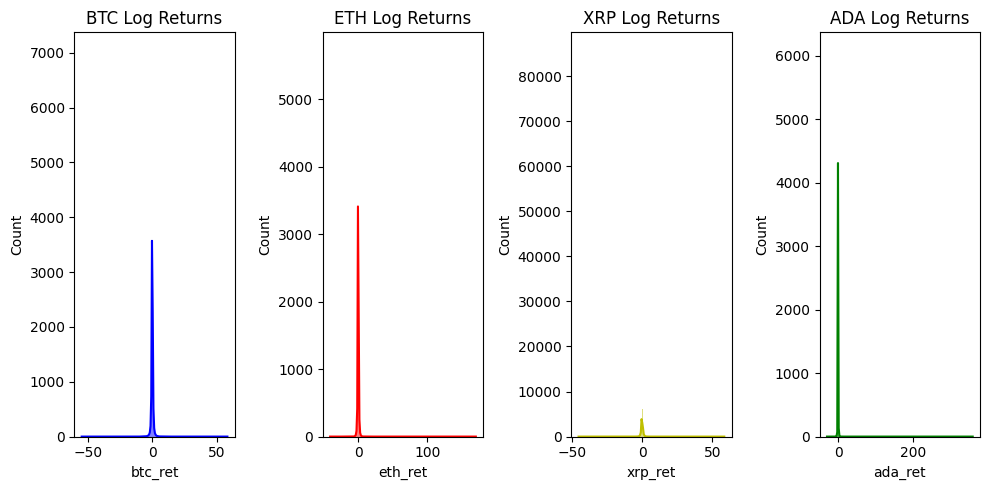

In [29]:
fig, axes = plt.subplots(1, 4, figsize=(10, 5))

# BTC
sns.histplot(data=df, x='btc_ret', ax=axes[0], kde=True, color='b')
axes[0].set_title('BTC Log Returns')

# ETH
sns.histplot(data=df, x='eth_ret', ax=axes[1], kde=True, color='r')
axes[1].set_title('ETH Log Returns')

# XRP
sns.histplot(data=df, x='xrp_ret', ax=axes[2], kde=True, color='y')
axes[2].set_title('XRP Log Returns')

# ADA
sns.histplot(data=df, x='ada_ret', ax=axes[3], kde=True, color='g')
axes[3].set_title('ADA Log Returns')

plt.tight_layout()
plt.show()

In [30]:
print(df.shape) # this shit is too big!!!

(306186, 12)


### can't observe shit

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

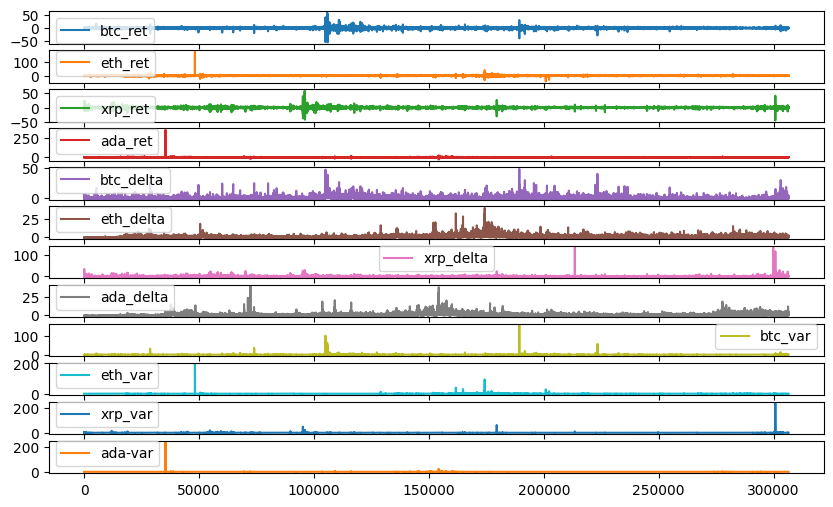

In [31]:
df.plot(subplots=True, figsize=(10,6))

### random sampling n=10000, kinda too empirical

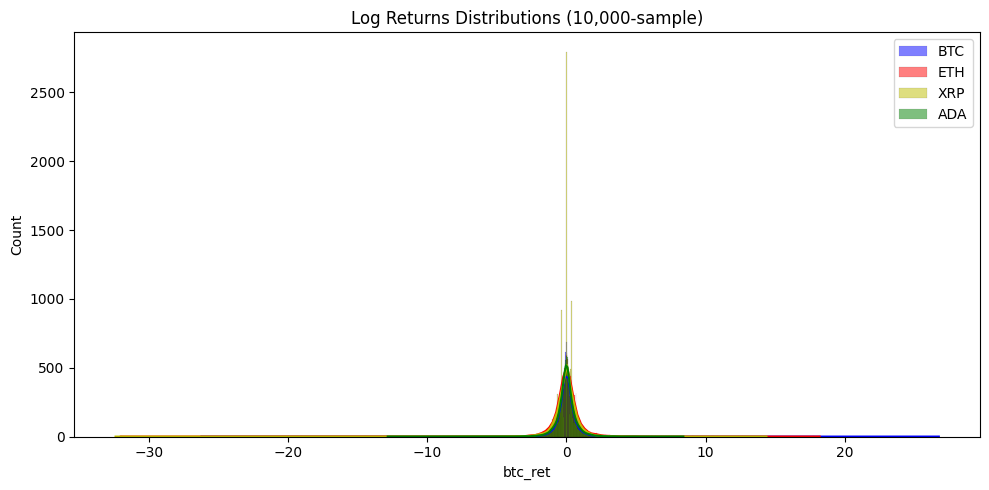

In [36]:
# Sample 10,000 rows for each coin (assuming df is large enough)
df_sample = df[['btc_ret','eth_ret','xrp_ret','ada_ret']].dropna().sample(10000)

plt.figure(figsize=(10, 5))

# Plot each coin's distribution on the same axes
sns.histplot(data=df_sample, x='btc_ret', kde=True, color='b', label='BTC', alpha=0.5)
sns.histplot(data=df_sample, x='eth_ret', kde=True, color='r', label='ETH', alpha=0.5)
sns.histplot(data=df_sample, x='xrp_ret', kde=True, color='y', label='XRP', alpha=0.5)
sns.histplot(data=df_sample, x='ada_ret', kde=True, color='g', label='ADA', alpha=0.5)

plt.title('Log Returns Distributions (10,000-sample)')
plt.legend()
plt.tight_layout()
plt.show()


### thats what I'm talking about LOL
#### Some insight: Different Skwness, trading opportunnity?

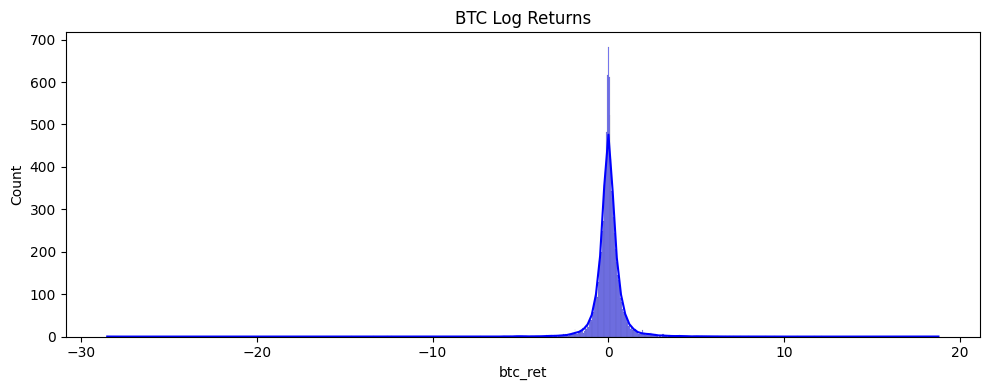

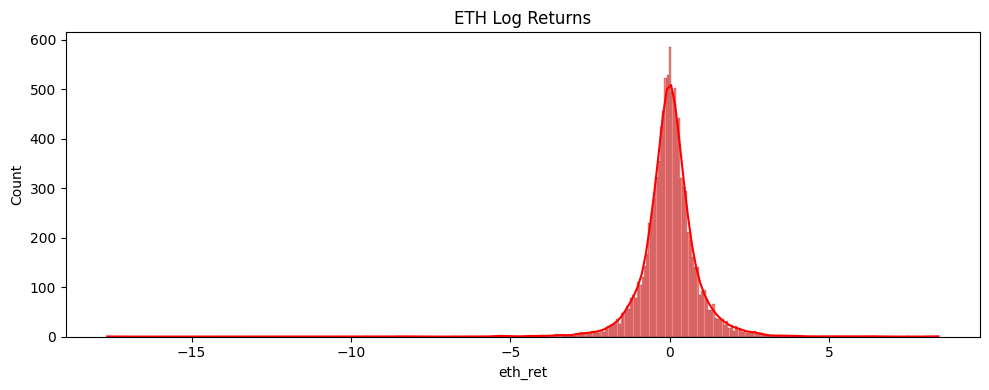

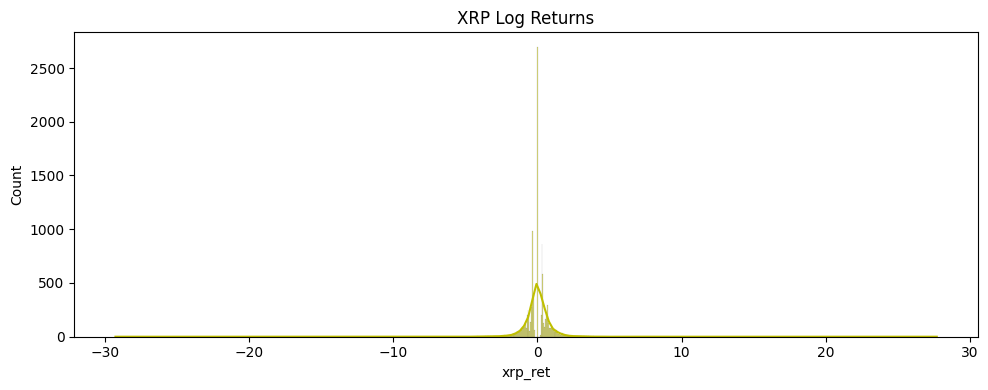

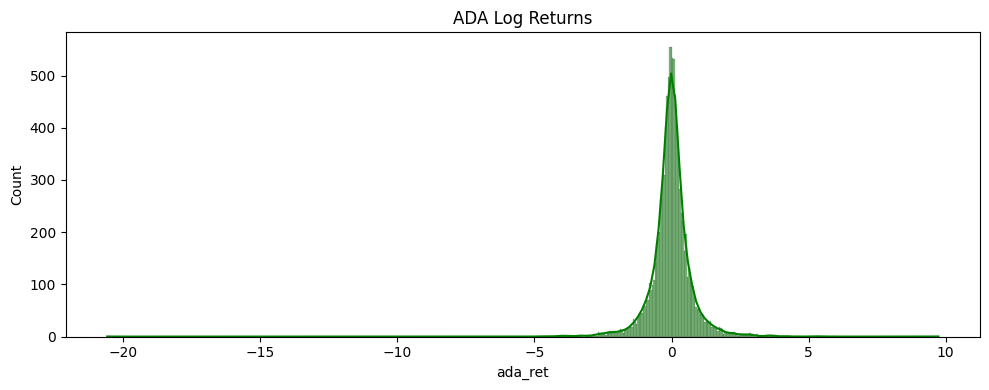

In [37]:
# Sample 10,000 rows per coin, ensuring no NaN values
df_btc = df[['btc_ret']].dropna().sample(10000)
df_eth = df[['eth_ret']].dropna().sample(10000)
df_xrp = df[['xrp_ret']].dropna().sample(10000)
df_ada = df[['ada_ret']].dropna().sample(10000)

# BTC
plt.figure(figsize=(10,4))
sns.histplot(data=df_btc, x='btc_ret', kde=True, color='b')
plt.title('BTC Log Returns')
plt.tight_layout()
plt.show()

# ETH
plt.figure(figsize=(10,4))
sns.histplot(data=df_eth, x='eth_ret', kde=True, color='r')
plt.title('ETH Log Returns')
plt.tight_layout()
plt.show()

# XRP
plt.figure(figsize=(10,4))
sns.histplot(data=df_xrp, x='xrp_ret', kde=True, color='y')
plt.title('XRP Log Returns')
plt.tight_layout()
plt.show()

# ADA
plt.figure(figsize=(10,4))
sns.histplot(data=df_ada, x='ada_ret', kde=True, color='g')
plt.title('ADA Log Returns')
plt.tight_layout()
plt.show()


In [32]:
df.corr()

,btc_ret,eth_ret,xrp_ret,ada_ret,btc_delta,eth_delta,xrp_delta,ada_delta,btc_var,eth_var,xrp_var,ada-var
btc_ret,1.000000,0.000499,0.001984,0.000198,-0.051448,0.004119,0.001443,0.002641,-0.012639,0.003269,0.001505,0.000419
eth_ret,0.000499,1.000000,-0.001042,-0.000848,0.000221,-0.000320,0.000666,0.002022,-0.001852,0.040153,-0.000238,-0.001858
xrp_ret,0.001984,-0.001042,1.000000,0.001138,-0.000028,0.001140,-0.070724,0.002653,0.001361,0.000530,0.007434,0.002639
ada_ret,0.000198,-0.000848,0.001138,1.000000,0.001823,-0.001569,0.000316,-0.000779,0.000102,0.000028,-0.000314,0.101033
btc_delta,-0.051448,0.000221,-0.000028,0.001823,1.000000,0.025911,0.017884,-0.013464,0.473189,0.011341,0.001365,-0.000955
eth_delta,0.004119,-0.000320,0.001140,-0.001569,0.025911,1.000000,-0.003713,0.154505,0.006429,0.264241,-0.006583,0.008635
xrp_delta,0.001443,0.000666,-0.070724,0.000316,0.017884,-0.003713,1.000000,-0.010135,0.002341,-0.003740,0.425809,0.000764
ada_delta,0.002641,0.002022,0.002653,-0.000779,-0.013464,0.154505,-0.010135,1.000000,-0.001175,0.020147,-0.005348,0.092151
btc_var,-0.012639,-0.001852,0.001361,0.000102,0.473189,0.006429,0.002341,-0.001175,1.000000,0.001873,-0.000506,-0.000746
eth_var,0.003269,0.040153,0.000530,0.000028,0.011341,0.264241,-0.003740,0.020147,0.001873,1.000000,-0.001673,0.000745


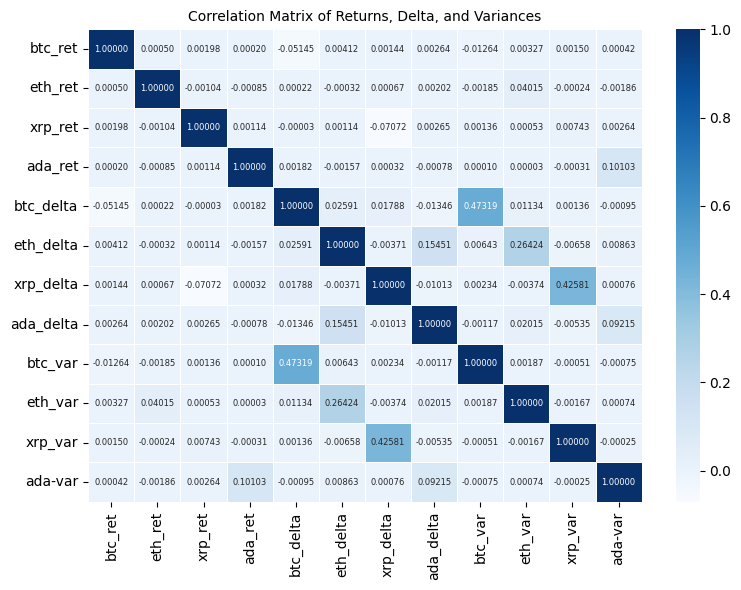

In [34]:
corr = df.corr()

# Set up the figure size (optional)
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='Blues', linewidths=0.5, fmt=".5f", annot_kws={"fontsize":6})

# Add a title for clarity (optional)
plt.title('Correlation Matrix of Returns, Delta, and Variances', fontsize=10)

# Display the heatmap
plt.tight_layout()
plt.show()

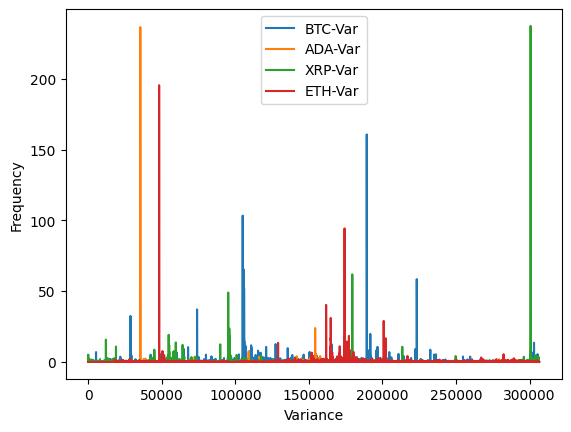

In [35]:
plt.plot(df['btc_var'], label='BTC-Var')
plt.plot(df['ada-var'], label='ADA-Var')
plt.plot(df['xrp_var'], label='XRP-Var')
plt.plot(df['eth_var'], label='ETH-Var')
plt.ylabel('Frequency')
plt.xlabel('Variance')
plt.legend()
plt.show()

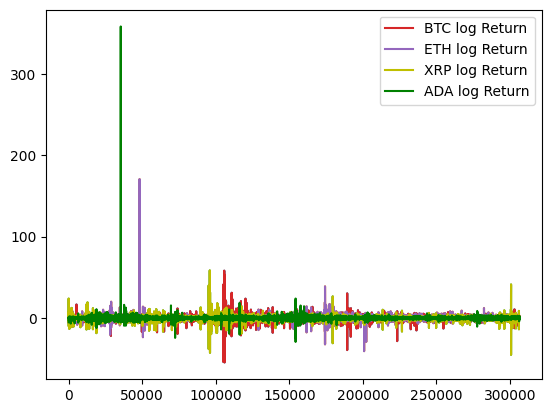

In [41]:
plt.plot(df[['btc_ret', 'eth_ret', 'xrp_ret']])
plt.plot(df['btc_ret'], label='BTC log Return')
plt.plot(df['eth_ret'], label='ETH log Return')
plt.plot(df['xrp_ret'], label='XRP log Return', c='y')
plt.plot(df['ada_ret'], label='ADA log Return', c='g')

plt.legend()

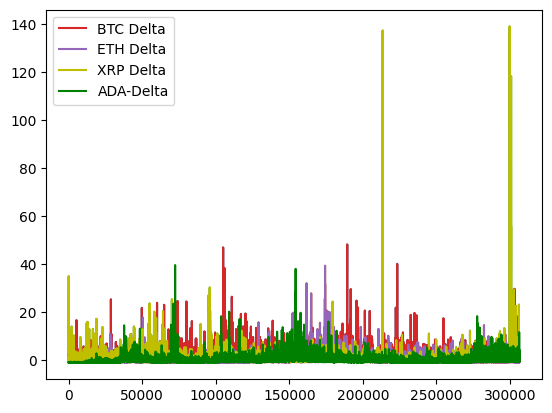

In [43]:
plt.plot(df[['btc_delta','eth_delta','xrp_delta']])
plt.plot(df['btc_delta'], label='BTC Delta')
plt.plot(df['eth_delta'], label='ETH Delta')
plt.plot(df['xrp_delta'], label='XRP Delta', c= 'y')
plt.plot(df['ada_delta'], label='ADA-Delta', c='g')

plt.legend()

In [38]:
df

,btc_ret,eth_ret,xrp_ret,ada_ret,btc_delta,eth_delta,xrp_delta,ada_delta,btc_var,eth_var,xrp_var,ada-var
9,-0.145846,0.025217,-0.000943,0.009614,-0.595747,-0.937579,-0.748095,-0.933681,-0.080396,-0.090746,-0.061368,-0.035444
10,-0.338939,0.016738,-0.000943,-0.001819,-0.407415,-0.938957,-0.748095,-0.941928,-0.078236,-0.090747,-0.061368,-0.035444
11,0.649121,0.283705,-0.000943,0.111755,-0.121070,-0.925730,-0.748095,-0.936739,-0.079291,-0.090747,-0.061368,-0.035444
12,-0.020506,-0.231159,-0.000943,0.077366,-0.500509,-0.916636,-0.748095,-0.931566,-0.081553,-0.090748,-0.061368,-0.035444
13,-0.212584,-0.065916,-0.000943,-0.183293,-0.555192,-0.934272,-0.748095,-0.933979,-0.082241,-0.090749,-0.061368,-0.035444
...,...,...,...,...,...,...,...,...,...,...,...,...
306520,0.387423,-0.526560,-0.226640,-0.753972,0.052733,-0.089712,-0.009333,1.288209,-0.029697,-0.072590,-0.043902,-0.023752
306521,0.639926,0.176176,-0.000943,-0.223539,0.557621,-0.634950,-0.255587,0.580375,-0.023596,-0.074409,-0.045245,-0.017594
306522,-0.894788,-0.154925,0.450377,-0.172997,0.954281,-0.189676,-0.009333,1.082335,-0.048562,-0.075500,-0.044716,-0.012900
306523,-0.070458,-0.022308,-1.129809,-0.594199,-0.598631,-0.648277,0.483175,2.448769,-0.067172,-0.075977,-0.044431,0.010139


### Regression Analysis
#### - Log Return Pair
#### - Delta Pair
#### - Varaince Pair

In [42]:
# Log return

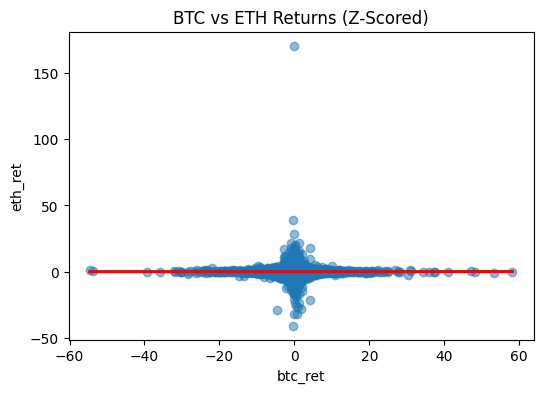

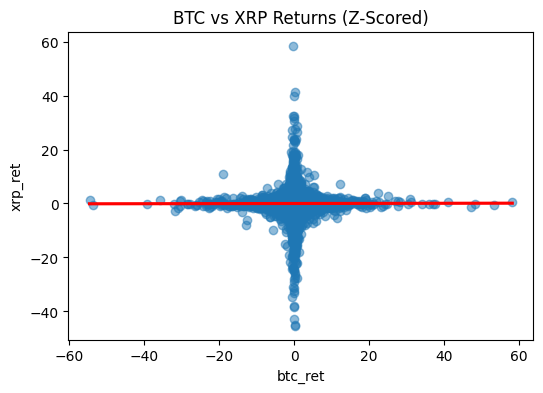

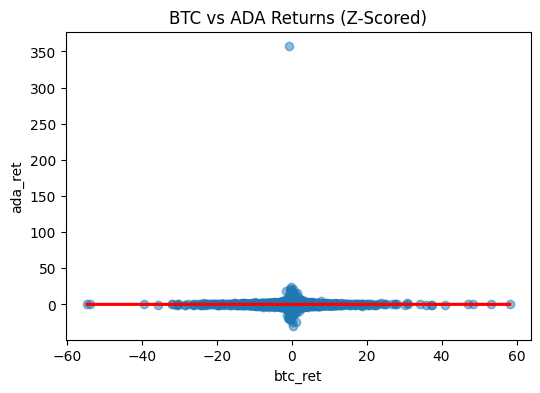

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df_z = pd.DataFrame(
    stats.zscore(df_data, nan_policy='omit'),  # ensure handling NaN if any
    columns=df_data.columns,
    index=df_data.index
)
plt.figure(figsize=(6, 4))
sns.regplot(data=df_z, x='btc_ret', y='eth_ret', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('BTC vs ETH Returns (Z-Scored)')
plt.show()

plt.figure(figsize=(6, 4))
sns.regplot(data=df_z, x='btc_ret', y='xrp_ret', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('BTC vs XRP Returns (Z-Scored)')
plt.show()

plt.figure(figsize=(6, 4))
sns.regplot(data=df_z, x='btc_ret', y='ada_ret', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('BTC vs ADA Returns (Z-Scored)')
plt.show()


In [44]:
# Delta

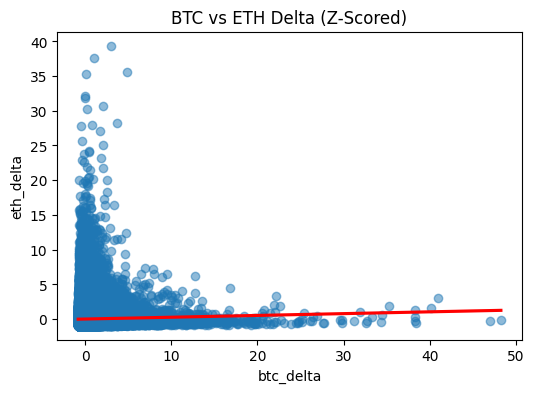

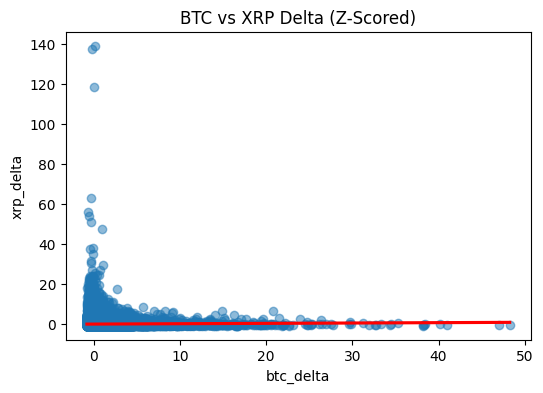

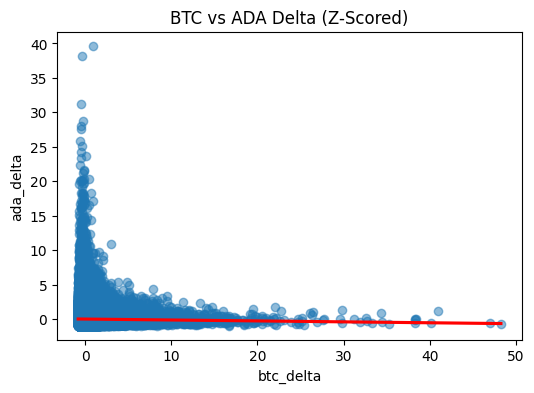

In [45]:
df_z = pd.DataFrame(
    stats.zscore(df_data, nan_policy='omit'),  # ensure handling NaN if any
    columns=df_data.columns,
    index=df_data.index
)
plt.figure(figsize=(6, 4))
sns.regplot(data=df_z, x='btc_delta', y='eth_delta', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('BTC vs ETH Delta (Z-Scored)')
plt.show()

plt.figure(figsize=(6, 4))
sns.regplot(data=df_z, x='btc_delta', y='xrp_delta', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('BTC vs XRP Delta (Z-Scored)')
plt.show()

plt.figure(figsize=(6, 4))
sns.regplot(data=df_z, x='btc_delta', y='ada_delta', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('BTC vs ADA Delta (Z-Scored)')
plt.show()

In [46]:
# Variance

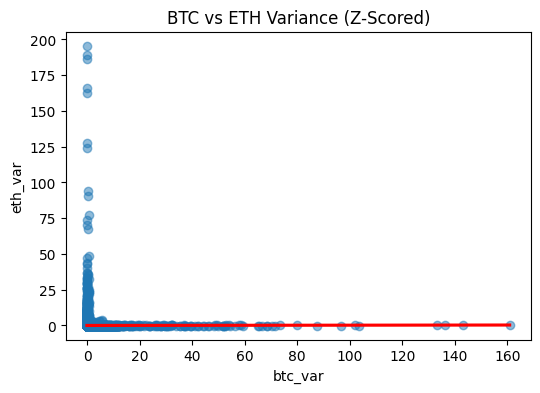

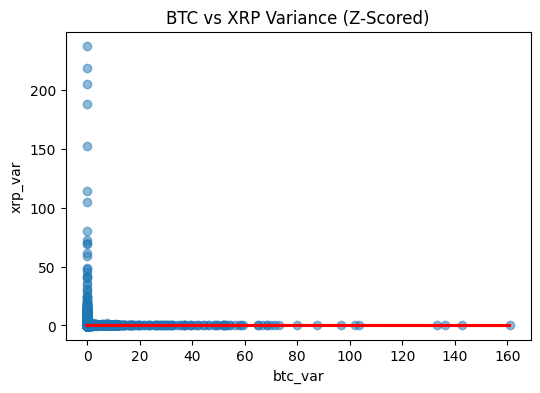

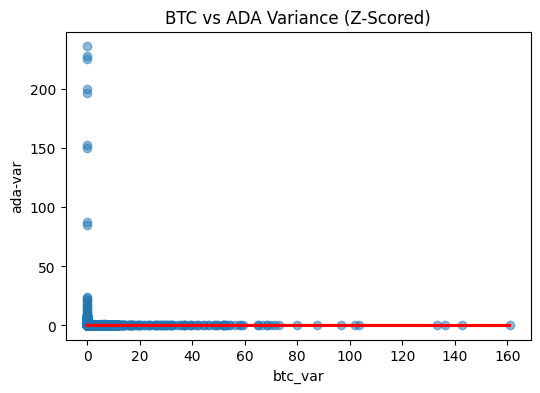

In [48]:
df_z = pd.DataFrame(
    stats.zscore(df_data, nan_policy='omit'),  # ensure handling NaN if any
    columns=df_data.columns,
    index=df_data.index
)
plt.figure(figsize=(6, 4))
sns.regplot(data=df_z, x='btc_var', y='eth_var', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('BTC vs ETH Variance (Z-Scored)')
plt.show()

plt.figure(figsize=(6, 4))
sns.regplot(data=df_z, x='btc_var', y='xrp_var', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('BTC vs XRP Variance (Z-Scored)')
plt.show()

plt.figure(figsize=(6, 4))
sns.regplot(data=df_z, x='btc_var', y='ada-var', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('BTC vs ADA Variance (Z-Scored)')
plt.show()

### Insight: The correlation is not as expected correlated --> try neutral strategy?